In [1]:
library(tidyverse)
library(babynames)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.5.1     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 1.0.0
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘babynames’ was built under R version 4.2.3”


## [14.2.4 Exercises](https://r4ds.hadley.nz/strings#exercises)

1. Create strings that contain the following values:

    1. He said "That's amazing!"

    2. \a\b\c\d

    3. \\\\\\\\\\\\

In [8]:
x <- c('He said "That\'s amazing!"', "\\a\\b\\c\\d", r"(\\\\\\)")
str_view(x)

[1] │ He said "That's amazing!"
[2] │ \a\b\c\d
[3] │ \\\\\\

2. Create the string in your R session and print it. What happens to the special “\u00a0”? How does str_view() display it? Can you do a little googling to figure out what this special character is?
```r
x <- "This\u00a0is\u00a0tricky"
```

In [9]:
x <- "This\u00a0is\u00a0tricky"
x
str_view(x)

[1] "This is tricky"

[1] │ This{\u00a0}is{\u00a0}tricky

Just printing the string turns the \u00a0 to a space. When you use str_view(), they are surrounded by curly brackets. the special \u00a0 is a non-breaking space character.

## [14.3.4 Exercises](https://r4ds.hadley.nz/strings#exercises-1)

1. Compare and contrast the results of paste0() with str_c() for the following inputs:
```r
str_c("hi ", NA)
str_c(letters[1:2], letters[1:3])
```

In [10]:
paste0("hi ", NA)
paste0(letters[1:2], letters[1:3])

str_c("hi ", NA)
str_c(letters[1:2], letters[1:3])

[1] "hi NA"

[1] "aa" "bb" "ac"

[1] NA

ERROR: [1m[33mError[39m in `str_c()`:[22m
[33m![39m Can't recycle `..1` (size 2) to match `..2` (size 3).


paste0 works better in these instances because str_c just returns NA for the first line and an error for the second.

2. What’s the difference between paste() and paste0()? How can you recreate the equivalent of paste() with str_c()?

paste() allows a separator argument while paste0() doesn't. To recreate the equivalent of paste() with str_c(), use str_replace_NA() inside of str_c().

3. Convert the following expressions from str_c() to str_glue() or vice versa:
```r
str_c("The price of ", food, " is ", price)

str_glue("I'm {age} years old and live in {country}")

str_c("\\section{", title, "}")
```

In [ ]:
str_glue("The price of {food} is {price}")
str_c("I'm ", age, " years old and live in ", country)
str_glue("\\section{{title}}")

## [14.5.3 Exercises](https://r4ds.hadley.nz/strings#exercises-2)

1. When computing the distribution of the length of babynames, why did we use wt = n?

To get the weigthed count of names.

2. Use str_length() and str_sub() to extract the middle letter from each baby name. What will you do if the string has an even number of characters?

If there is an even number of characters, it will print the middle two characters.

In [18]:
babynames |> 
  mutate(
    middle = case_when(
      str_length(name)%%2 != 0 ~ str_sub(name, (str_length(name)/2)+1, (str_length(name)/2)+1),
      str_length(name)%%2 == 0 ~ str_sub(name, (str_length(name)/2), (str_length(name)/2)+1)
    ),
    .keep = "used"
  )

name,middle
<chr>,<chr>
Mary,ar
Anna,nn
Emma,mm
Elizabeth,a
Minnie,nn
Margaret,ga
Ida,d
Alice,i
Bertha,rt


3. Are there any major trends in the length of babynames over time? What about the popularity of first and last letters?

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


first,n
<chr>,<int>
A,187950
M,159008
J,145086
S,135075
C,133835
L,130975
D,130657
K,121874
T,105766


last,n
<chr>,<int>
a,497580
e,346168
n,313921
y,130655
l,105310
s,79510
i,77883
h,73724
o,68408


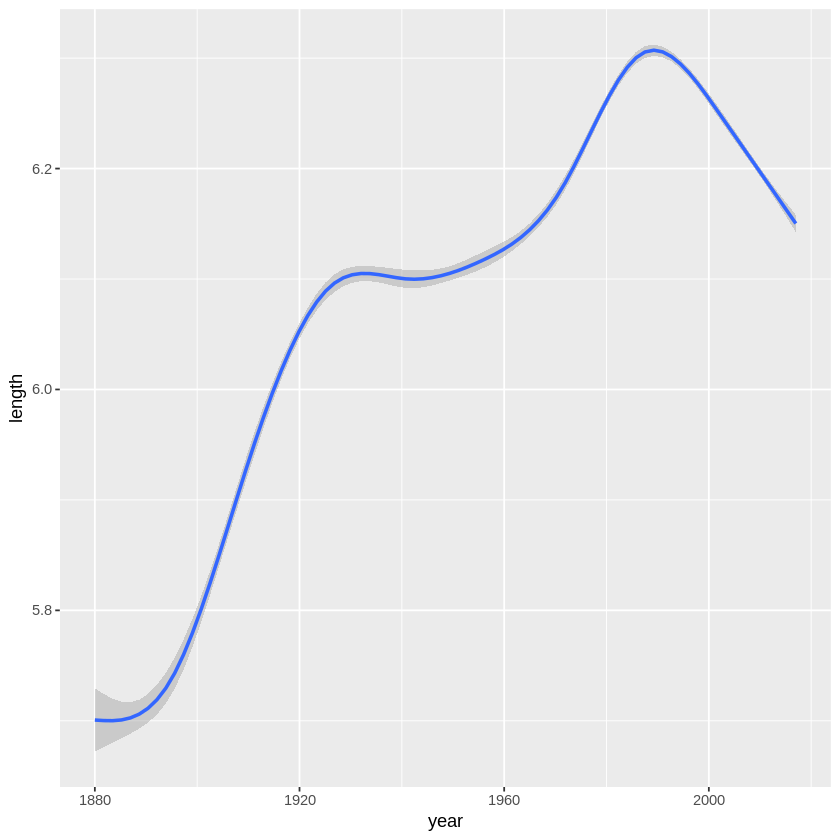

In [36]:
babynames |>
    group_by(year) |>
    mutate(length = str_length(name)) |>
    ggplot(aes(x=year, y=length)) +
    geom_smooth()

babynames |> 
  mutate(
    first = str_sub(name, 1, 1),
    last = str_sub(name, -1, -1)
  ) |>
  group_by(first) |>
  summarize(n = n()) |>
  arrange(desc(n))

babynames |> 
  mutate(
    first = str_sub(name, 1, 1),
    last = str_sub(name, -1, -1)
  ) |>
  group_by(last) |>
  summarize(n = n()) |>
  arrange(desc(n))


Over time, the length of names has generally increased. The letter 'a' is both the most common first and last letter.

## [15.3.5 Exercises](https://r4ds.hadley.nz/regexps#exercises)

1. What baby name has the most vowels? What name has the highest proportion of vowels? (Hint: what is the denominator?)

In [19]:
babynames |> 
  mutate(
    name = str_to_lower(name),
    vowels = str_count(name, "[aeiou]")
  ) |>
  select(name, vowels) |>
  group_by(name) |>
  arrange(desc(vowels))

babynames |> 
  mutate(
    name = str_to_lower(name),
    vowel_prop = as.double(str_count(name, "[aeiou]") / str_length(name))
  ) |>
  select(name, vowel_prop) |>
  arrange(desc(vowel_prop))

name,vowels
<chr>,<int>
mariaguadalupe,8
mariaguadalupe,8
mariadelrosario,8
mariaguadalupe,8
mariaguadalupe,8
mariaguadalupe,8
mariaguadalupe,8
mariaguadalupe,8
mariadelrosario,8


name,vowel_prop
<chr>,<dbl>
eua,1
eua,1
eua,1
eua,1
ea,1
ai,1
ai,1
ai,1
ia,1


mariaguadalupe and mariadelrosario have the most vowels. There are many names listed above that are only vowels.

2. Replace all forward slashes in "a/b/c/d/e" with backslashes. What happens if you attempt to undo the transformation by replacing all backslashes with forward slashes? (We’ll discuss the problem very soon.)

In [28]:
str_view(str_replace_all("a/b/c/d/e", "/", "\\\\"))
str_view(str_replace_all("a/b/c/d/e", "\\\\", "/"))

[1] │ a\b\c\d\e

[1] │ a/b/c/d/e

3. Implement a simple version of str_to_lower() using str_replace_all().

In [33]:
x <- c("APPLE", "Pear", "banana")
str_replace_all(x, "[A-Z]", tolower)

[1] "apple"  "pear"   "banana"

4. Create a regular expression that will match telephone numbers as commonly written in your country.

In [38]:
example <- c("(123)-456-7890", "23(8)98-7-34")
str_detect(example, "\\([0-9]+\\)\\-[0-9]+\\-[0-9]+")

[1]  TRUE FALSE

## [15.4.7 Exercises](https://r4ds.hadley.nz/regexps#exercises-1)

1. How would you match the literal string "'\\? How about ```"$^$"```?

In [42]:
x <- "\"'\\"
str_view(x, "\"'\\\\")

y <- "\"$^$\""
str_view(y, "\"\\$\\^\\$\"")

[1] │ <"'\>

[1] │ <"$^$">

2. Explain why each of these patterns don’t match a \: "\\", "\\\\", "\\\\\\".

The first one is just an escape. The second escapes the escape, but still needs a character after it. The third doesn't work because you need to escape the last \ or it doesn't show up.

3. Given the corpus of common words in stringr::words, create regular expressions that find all words that:

    a. Start with “y”.  
    b. Don’t start with “y”.  
    c. End with “x”.  
    d. Are exactly three letters long. (Don’t cheat by using str_length()!)  
    e. Have seven letters or more.  
    f. Contain a vowel-consonant pair.  
    g. Contain at least two vowel-consonant pairs in a row.  
    h. Only consist of repeated vowel-consonant pairs.  

In [56]:
cat("Part a")
str_view(words, "^y")

cat("Part b")
str_view(words, "^[^y]")

cat("Part c")
str_view(words, "x$")

cat("Part d")
str_view(words, "^...$")

cat("Part e")
str_view(words, "[a-zA-z]{7,}")

cat("Part f")
str_view(words, "[aeiou][^aeiou]")

cat("Part g")
str_view(words, "[aeiou][^aeiou][aeiou][^aeiou]")

cat("Part h")
str_view(words, "^(?:[aeiou][^aeiou]){2,}$")

Part a

[975] │ <y>ear
[976] │ <y>es
[977] │ <y>esterday
[978] │ <y>et
[979] │ <y>ou
[980] │ <y>oung

Part b

 [1] │ <a>
 [2] │ <a>ble
 [3] │ <a>bout
 [4] │ <a>bsolute
 [5] │ <a>ccept
 [6] │ <a>ccount
 [7] │ <a>chieve
 [8] │ <a>cross
 [9] │ <a>ct
[10] │ <a>ctive
[11] │ <a>ctual
[12] │ <a>dd
[13] │ <a>ddress
[14] │ <a>dmit
[15] │ <a>dvertise
[16] │ <a>ffect
[17] │ <a>fford
[18] │ <a>fter
[19] │ <a>fternoon
[20] │ <a>gain
... and 954 more

Part c

[108] │ bo<x>
[747] │ se<x>
[772] │ si<x>
[841] │ ta<x>

Part d

  [9] │ <act>
 [12] │ <add>
 [22] │ <age>
 [24] │ <ago>
 [26] │ <air>
 [27] │ <all>
 [38] │ <and>
 [41] │ <any>
 [51] │ <arm>
 [54] │ <art>
 [56] │ <ask>
 [68] │ <bad>
 [69] │ <bag>
 [73] │ <bar>
 [82] │ <bed>
 [89] │ <bet>
 [91] │ <big>
 [94] │ <bit>
[108] │ <box>
[109] │ <boy>
... and 90 more

Part e

 [4] │ <absolute>
 [6] │ <account>
 [7] │ <achieve>
[13] │ <address>
[15] │ <advertise>
[19] │ <afternoon>
[21] │ <against>
[31] │ <already>
[32] │ <alright>
[34] │ <although>
[36] │ <america>
[39] │ <another>
[43] │ <apparent>
[46] │ <appoint>
[47] │ <approach>
[48] │ <appropriate>
[53] │ <arrange>
[57] │ <associate>
[61] │ <authority>
[62] │ <available>
... and 199 more

Part f

 [2] │ <ab>le
 [3] │ <ab>o<ut>
 [4] │ <ab>s<ol><ut>e
 [5] │ <ac>c<ep>t
 [6] │ <ac>co<un>t
 [7] │ <ac>hi<ev>e
 [8] │ <ac>r<os>s
 [9] │ <ac>t
[10] │ <ac>t<iv>e
[11] │ <ac>tu<al>
[12] │ <ad>d
[13] │ <ad>dr<es>s
[14] │ <ad>m<it>
[15] │ <ad>v<er>t<is>e
[16] │ <af>f<ec>t
[17] │ <af>f<or>d
[18] │ <af>t<er>
[19] │ <af>t<er>no<on>
[20] │ <ag>a<in>
[21] │ <ag>a<in>st
... and 924 more

Part g

  [4] │ abs<olut>e
 [23] │ <agen>t
 [30] │ <alon>g
 [36] │ <amer>ica
 [39] │ <anot>her
 [42] │ <apar>t
 [43] │ app<aren>t
 [61] │ auth<orit>y
 [62] │ ava<ilab>le
 [63] │ <awar>e
 [64] │ <away>
 [70] │ b<alan>ce
 [75] │ b<asis>
 [81] │ b<ecom>e
 [83] │ b<efor>e
 [84] │ b<egin>
 [85] │ b<ehin>d
 [87] │ b<enef>it
[119] │ b<usin>ess
[143] │ ch<arac>ter
... and 149 more

Part h

 [64] │ <away>
[265] │ <eleven>
[279] │ <even>
[281] │ <ever>
[436] │ <item>
[573] │ <okay>
[579] │ <open>
[586] │ <original>
[591] │ <over>
[905] │ <unit>
[911] │ <upon>

4. Create 11 regular expressions that match the British or American spellings for each of the following words: airplane/aeroplane, aluminum/aluminium, analog/analogue, ass/arse, center/centre, defense/defence, donut/doughnut, gray/grey, modeling/modelling, skeptic/sceptic, summarize/summarise. Try and make the shortest possible regex!

In [77]:
x <- c("airplane", "aeroplane", "aluminum", "aluminium", "analog", "analogue", "ass", "arse", "center", "centre", "defense", "defence", "donut", "doughnut", "gray", "grey", "modeling", "modelling", "skeptic", "sceptic", "summarize", "summarise")

cat("airplane/aeroplane")
str_view(x, "a[i|e]ro?plane")

cat("aluminum/aluminium")
str_view(x, "alumini?um")

cat("analog/analogue")
str_view(x, "analogu?e?")

cat("ass/arse")
str_view(x, "ar?s{1,2}e?")

cat("center/centre")
str_view(x, "cent[r|e][r|e]")

cat("defense/defence")
str_view(x, "defen[c|s]e")

cat("donut/doughnut")
str_view(x, "do(ugh)?nut")

cat("gray/grey")
str_view(x, "gr[a|e]y")

cat("modeling/modelling")
str_view(x, "model{1,2}ing")

cat("skeptic/sceptic")
str_view(x, "s[k|c]eptic")

cat("summarize/summarise")
str_view(x, "summari[z|s]e")

airplane/aeroplane

[1] │ <airplane>
[2] │ <aeroplane>

aluminum/aluminium

[3] │ <aluminum>
[4] │ <aluminium>

analog/analogue

[5] │ <analog>
[6] │ <analogue>

ass/arse

[7] │ <ass>
[8] │ <arse>

center/centre

 [9] │ <center>
[10] │ <centre>

defense/defence

[11] │ <defense>
[12] │ <defence>

donut/doughnut

[13] │ <donut>
[14] │ <doughnut>

gray/grey

[15] │ <gray>
[16] │ <grey>

modeling/modelling

[17] │ <modeling>
[18] │ <modelling>

skeptic/sceptic

[19] │ <skeptic>
[20] │ <sceptic>

summarize/summarise

[21] │ <summarize>
[22] │ <summarise>

5. Switch the first and last letters in words. Which of those strings are still words?

In [81]:
swapped <- str_replace(words, "(.)(.*)(.)", "\\3\\2\\1")
swapped[swapped %in% words]

[1] "a"          "america"    "area"       "dad"        "dead"      
 [6] "lead"       "read"       "depend"     "god"        "educate"   
[11] "else"       "encourage"  "engine"     "europe"     "evidence"  
[16] "example"    "excuse"     "exercise"   "expense"    "experience"
[21] "eye"        "dog"        "health"     "high"       "knock"     
[26] "deal"       "level"      "local"      "nation"     "on"        
[31] "non"        "no"         "rather"     "dear"       "refer"     
[36] "remember"   "serious"    "stairs"     "test"       "tonight"   
[41] "transport"  "treat"      "trust"      "window"     "yesterday"

6. Describe in words what these regular expressions match: (read carefully to see if each entry is a regular expression or a string that defines a regular expression.)

    a. ^.*$  
    b. "\\\\{.+\\\\}"   
    c. \d{4}-\d{2}-\d{2}  
    d. "\\\\\\\\{4}"  
    e. \\..\\..\\..  
    f. (.)\1\1  
    g. "(..)\\\\1"  

a. Matches any string.  
b. Matches anything inside curly brackets.  
c. Matches 4 numbers - 2 numbers - 2 numbers. ex: 1234-56-78  
d. Matches 4 \ in a row.  
e. Matches . character . character . character. ex: .a.b.c  
f. Matches any character that appears three times in a row. ex: bbb  
g. Matches any two characters that are repeated in a row. ex: abab

7. Solve the beginner regexp crosswords at https://regexcrossword.com/challenges/beginner.

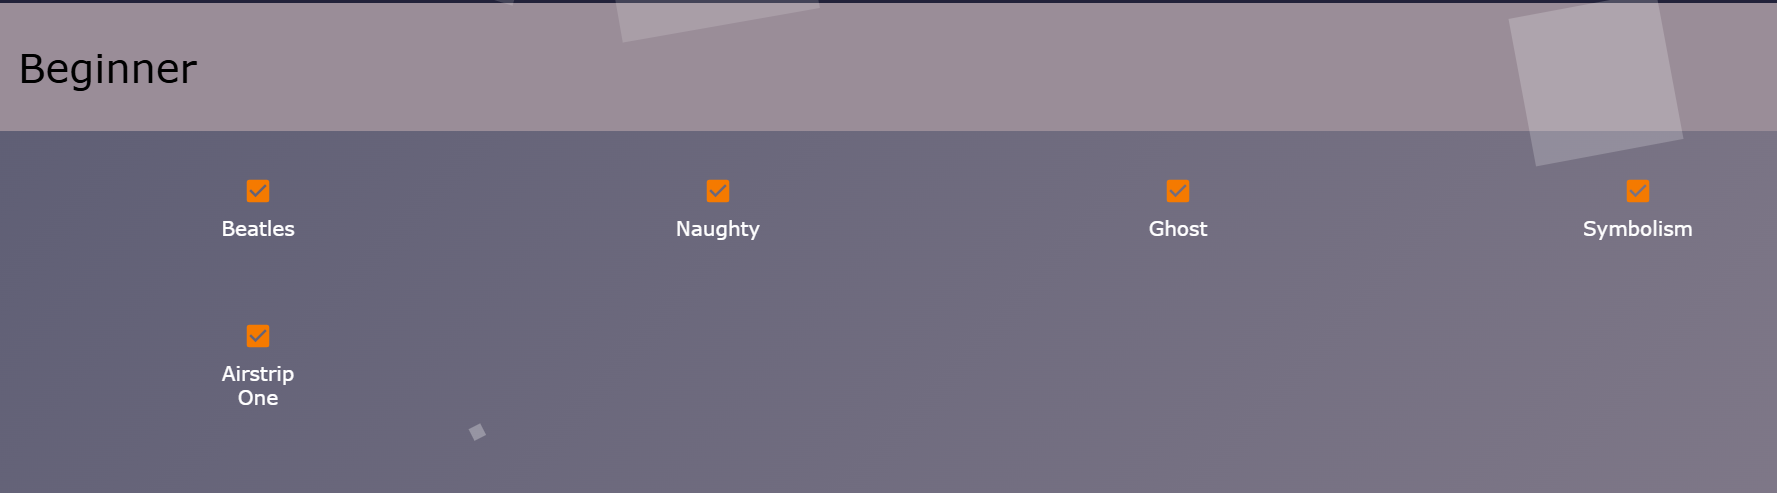

## [15.6.4 Exercises](https://r4ds.hadley.nz/regexps#exercises-2)

1. For each of the following challenges, try solving it by using both a single regular expression, and a combination of multiple str_detect() calls.

    a. Find all words that start or end with x.  
    b. Find all words that start with a vowel and end with a consonant.  
    c. Are there any words that contain at least one of each different vowel?  

In [95]:
cat("Part a")
str_view(words, "(^xX)|(x$)")
words[str_detect(words, "^[xX]") | str_detect(words, "[xX]$")]

cat("Part b")
str_view(words, "^[aeiouAEIOU].*[^aeiouAEIOU]$")
words[str_detect(words, "^[aeiouAEIOU]") & str_detect(words, "[^aeiouAEIOU]$")]

cat("Part c")
# too complicated to do in one line
words[
  str_detect(words, "a") &
  str_detect(words, "e") &
  str_detect(words, "i") &
  str_detect(words, "o") &
  str_detect(words, "u")
]

Part a

[108] │ bo<x>
[747] │ se<x>
[772] │ si<x>
[841] │ ta<x>

[1] "box" "sex" "six" "tax"

Part b

 [3] │ <about>
 [5] │ <accept>
 [6] │ <account>
 [8] │ <across>
 [9] │ <act>
[11] │ <actual>
[12] │ <add>
[13] │ <address>
[14] │ <admit>
[16] │ <affect>
[17] │ <afford>
[18] │ <after>
[19] │ <afternoon>
[20] │ <again>
[21] │ <against>
[23] │ <agent>
[26] │ <air>
[27] │ <all>
[28] │ <allow>
[29] │ <almost>
... and 102 more

[1] "about"       "accept"      "account"     "across"      "act"        
  [6] "actual"      "add"         "address"     "admit"       "affect"     
 [11] "afford"      "after"       "afternoon"   "again"       "against"    
 [16] "agent"       "air"         "all"         "allow"       "almost"     
 [21] "along"       "already"     "alright"     "although"    "always"     
 [26] "amount"      "and"         "another"     "answer"      "any"        
 [31] "apart"       "apparent"    "appear"      "apply"       "appoint"    
 [36] "approach"    "arm"         "around"      "art"         "as"         
 [41] "ask"         "at"          "attend"      "authority"   "away"       
 [46] "awful"       "each"        "early"       "east"        "easy"       
 [51] "eat"         "economy"     "effect"      "egg"         "eight"      
 [56] "either"      "elect"       "electric"    "eleven"      "employ"     
 [61] "end"         "english"     "enjoy"       "enough"      "enter"      
 [66] "environment" "equal"       "especial"    "even"        "evening"    
 [71] "ever"        "every"       "exact"       "except"      "exist"      
 [76] "expect"      "explain"     "express"     "identify"    "if"         
 [81] "important"   "in"          "indeed"      "individual"  "industry"   
 [86] "inform"      "instead"     "interest"    "invest"      "it"         
 [91] "item"        "obvious"     "occasion"    "odd"         "of"         
 [96] "off"         "offer"       "often"       "okay"        "old"        
[101] "on"          "only"        "open"        "opportunity" "or"         
[106] "order"       "original"    "other"       "ought"       "out"        
[111] "over"        "own"         "under"       "understand"  "union"      
[116] "unit"        "university"  "unless"      "until"       "up"         
[121] "upon"        "usual"

Part c

character(0)

2. Construct patterns to find evidence for and against the rule “i before e except after c”?

In [111]:
for_rule <- c("[^c]ie", "cei")
pattern_f <- str_c("(", str_flatten(for_rule, "|"), ")")
cat("For:")
str_view(words, pattern_f)

against_rule <- c("cie", "[^c]ei")
pattern_a <- str_c("(", str_flatten(against_rule, "|"), ")")
cat("Against:")
str_view(words, pattern_a)

For:

  [7] │ ac<hie>ve
 [86] │ be<lie>ve
[111] │ b<rie>f
[158] │ c<lie>nt
[228] │ <die>
[292] │ expe<rie>nce
[310] │ <fie>ld
[342] │ f<rie>nd
[472] │ <lie>
[620] │ <pie>ce
[670] │ q<uie>t
[684] │ re<cei>ve
[872] │ <tie>
[918] │ <vie>w

Against:

[726] │ s<cie>nce
[781] │ so<cie>ty
[939] │ <wei>gh

3. colors() contains a number of modifiers like “lightgray” and “darkblue”. How could you automatically identify these modifiers? (Think about how you might detect and then remove the colors that are modified).

In [126]:
cols <- colors()
cols <- cols[!str_detect(cols, "\\d")]
cols <- cols[!str_detect(cols, "\\b(?:light|dark)\\w*\\b")]
cols

[1] "white"             "aliceblue"         "antiquewhite"     
  [4] "aquamarine"        "azure"             "beige"            
  [7] "bisque"            "black"             "blanchedalmond"   
 [10] "blue"              "blueviolet"        "brown"            
 [13] "burlywood"         "cadetblue"         "chartreuse"       
 [16] "chocolate"         "coral"             "cornflowerblue"   
 [19] "cornsilk"          "cyan"              "deeppink"         
 [22] "deepskyblue"       "dimgray"           "dimgrey"          
 [25] "dodgerblue"        "firebrick"         "floralwhite"      
 [28] "forestgreen"       "gainsboro"         "ghostwhite"       
 [31] "gold"              "goldenrod"         "gray"             
 [34] "green"             "greenyellow"       "grey"             
 [37] "honeydew"          "hotpink"           "indianred"        
 [40] "ivory"             "khaki"             "lavender"         
 [43] "lavenderblush"     "lawngreen"         "lemonchiffon"     
 [46] "limegreen"         "linen"             "magenta"          
 [49] "maroon"            "mediumaquamarine"  "mediumblue"       
 [52] "mediumorchid"      "mediumpurple"      "mediumseagreen"   
 [55] "mediumslateblue"   "mediumspringgreen" "mediumturquoise"  
 [58] "mediumvioletred"   "midnightblue"      "mintcream"        
 [61] "mistyrose"         "moccasin"          "navajowhite"      
 [64] "navy"              "navyblue"          "oldlace"          
 [67] "olivedrab"         "orange"            "orangered"        
 [70] "orchid"            "palegoldenrod"     "palegreen"        
 [73] "paleturquoise"     "palevioletred"     "papayawhip"       
 [76] "peachpuff"         "peru"              "pink"             
 [79] "plum"              "powderblue"        "purple"           
 [82] "red"               "rosybrown"         "royalblue"        
 [85] "saddlebrown"       "salmon"            "sandybrown"       
 [88] "seagreen"          "seashell"          "sienna"           
 [91] "skyblue"           "slateblue"         "slategray"        
 [94] "slategrey"         "snow"              "springgreen"      
 [97] "steelblue"         "tan"               "thistle"          
[100] "tomato"            "turquoise"         "violet"           
[103] "violetred"         "wheat"             "whitesmoke"       
[106] "yellow"            "yellowgreen"

4. Create a regular expression that finds any base R dataset. You can get a list of these datasets via a special use of the data() function: data(package = "datasets")$results[, "Item"]. Note that a number of old datasets are individual vectors; these contain the name of the grouping “data frame” in parentheses, so you’ll need to strip those off.

In [135]:
datasets <- data(package = "datasets")$results[, "Item"]
datasets <- str_remove_all(datasets, "\\s+\\(.*\\)")
reg_exp <- str_c("(", str_flatten(datasets, "|"), ")")

example <- c("presidents", "rock", "USArrests")
str_view(example, reg_exp)

[1] │ <presidents>
[2] │ <rock>
[3] │ <USArrests>